In [2]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) 

In [4]:
conn = connect_mysql()
query = 'select * from lol_datas'
df=pd.DataFrame(sql_execute_dict(conn,query))
conn.close()

In [5]:
df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
0,KR_6622380599,1104,13.14.522.7601,starbro123,289,1,Poppy,10710,TOP,100,...,6689,7419,8078,8219,0,0,0,0,0,0
1,KR_6622380599,1104,13.14.522.7601,제이를 좋아해요,93,2,Viego,8808,JUNGLE,100,...,7449,8106,9034,9252,0,0,0,0,0,0
2,KR_6622380599,1104,13.14.522.7601,HaagenDaGou,87,3,Azir,10095,MIDDLE,100,...,6557,7259,7452,7770,0,0,0,0,0,0
3,KR_6622380599,1104,13.14.522.7601,J D YY,390,4,Xayah,7252,BOTTOM,100,...,7299,7765,8502,8657,0,0,0,0,0,0
4,KR_6622380599,1104,13.14.522.7601,DK BeryL9,83,5,Rell,5712,UTILITY,100,...,5154,5345,5715,5772,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71521,KR_6871532701,1244,13.24.547.9214,정훈 장,154,4,Karma,17000,,100,...,19110,19110,19460,19810,22810,22810,0,0,0,0
71522,KR_6871532701,1244,13.24.547.9214,도끼를든말파이트,411,5,Zac,17000,,200,...,18755,18755,18755,18755,19105,19105,0,0,0,0
71523,KR_6871532701,1244,13.24.547.9214,Poro in the Box,348,6,Rammus,17000,,200,...,18750,18750,18750,18750,19100,19100,0,0,0,0
71524,KR_6871532701,1244,13.24.547.9214,입 털려고 게임함,406,7,Garen,11000,,200,...,11000,11000,11000,11000,11000,11000,0,0,0,0


In [6]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [7]:
tmp = df[['teamPosition', 'totalDamageDealtToChampions', 'totalDamageTaken', 'g_15']]

In [8]:
tmp=tmp[tmp.teamPosition !='']

In [9]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,TOP,16199,12908,6212
1,JUNGLE,12057,16026,6931
2,MIDDLE,11248,11933,5674
3,BOTTOM,12248,6739,6182
4,UTILITY,4006,9176,4731
...,...,...,...,...
71513,TOP,17636,23866,6511
71514,JUNGLE,7408,16880,5837
71515,MIDDLE,8556,15556,4489
71516,BOTTOM,14299,10236,6091


In [10]:
group_df = tmp.groupby('teamPosition').mean().round()

In [11]:
group_df

,totalDamageDealtToChampions,totalDamageTaken,g_15
teamPosition,,,
BOTTOM,21086.0,18425.0,6004.0
JUNGLE,16697.0,29314.0,5845.0
MIDDLE,20668.0,21216.0,5712.0
TOP,20012.0,27318.0,5485.0
UTILITY,10025.0,17579.0,4178.0


# 특정인덱스 꺼내오기  .iloc // loc 차이 ★

In [12]:
group_df.loc['BOTTOM']
group_df.iloc[0]

totalDamageDealtToChampions    21086.0
totalDamageTaken               18425.0
g_15                            6004.0
Name: BOTTOM, dtype: float64

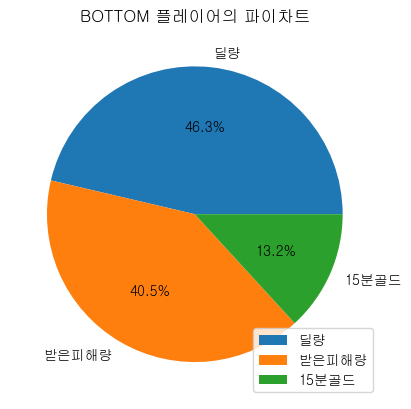

In [13]:
plt.figure()
# pie 차트를 그리기 위한 데이터
data = group_df.loc['BOTTOM']
# explode 파라미터에는 피해량, 받은 피해량, 15분 골드에 대한 비율을 지정
explode = (0, 0, 0)
# pie 차트 그리기
plt.pie(data, labels=['딜량', '받은피해량', '15분골드'], shadow=False, autopct='%1.1f%%', explode=explode)
# 그래프 제목 추가
plt.title('BOTTOM 플레이어의 파이차트')
#grid
plt.grid(True)
#legend 범례 1/2/3/4 분면으로 옮길수 있음
plt.legend(loc=4)

In [14]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,TOP,16199,12908,6212
1,JUNGLE,12057,16026,6931
2,MIDDLE,11248,11933,5674
3,BOTTOM,12248,6739,6182
4,UTILITY,4006,9176,4731
...,...,...,...,...
71513,TOP,17636,23866,6511
71514,JUNGLE,7408,16880,5837
71515,MIDDLE,8556,15556,4489
71516,BOTTOM,14299,10236,6091


In [15]:
#필요한 데이터만 다시 정제
my_tmp = tmp[['teamPosition','totalDamageDealtToChampions']]

In [16]:
my_tmp

,teamPosition,totalDamageDealtToChampions
0,TOP,16199
1,JUNGLE,12057
2,MIDDLE,11248
3,BOTTOM,12248
4,UTILITY,4006
...,...,...
71513,TOP,17636
71514,JUNGLE,7408
71515,MIDDLE,8556
71516,BOTTOM,14299


In [17]:
my_tmp.set_index('teamPosition',inplace=True)

In [18]:
my_tmp

,totalDamageDealtToChampions
teamPosition,
TOP,16199
JUNGLE,12057
MIDDLE,11248
BOTTOM,12248
UTILITY,4006
...,...
TOP,17636
JUNGLE,7408
MIDDLE,8556


Text(0, 0.5, '빈도')

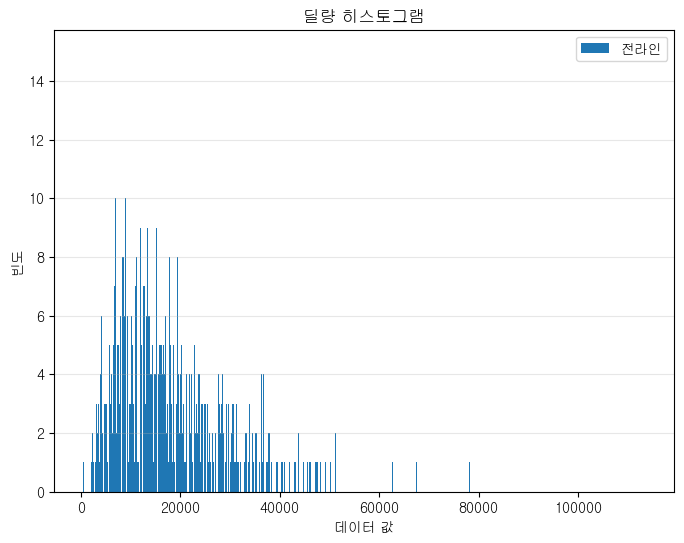

In [19]:
plt.figure(figsize=(8, 6))

# 히스토그램 그리기
plt.hist(my_tmp, bins=len(my_tmp), label='전라인', rwidth=0.9)
# 범례 추가
plt.legend(loc='upper right')
plt.grid(axis = 'y', alpha =0.3)
# 그래프 제목 추가
plt.title('딜량 히스토그램')
plt.xlabel('데이터 값')
plt.ylabel('빈도')

In [20]:
import seaborn as sns

In [21]:
#서울시 주차장비용 데이터
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [22]:
df=get_df(url)

In [23]:
df

,PARKING_NAME,ADDR,PARKING_CODE,PARKING_TYPE,PARKING_TYPE_NM,OPERATION_RULE,OPERATION_RULE_NM,TEL,QUE_STATUS,QUE_STATUS_NM,...,TIME_RATE,ADD_RATES,ADD_TIME_RATE,BUS_RATES,BUS_TIME_RATE,BUS_ADD_TIME_RATE,BUS_ADD_RATES,DAY_MAXIMUM,LAT,LNG
0,초안산근린공원주차장(구),도봉구 창동 24-0,1010089,NW,노외 주차장,1,시간제 주차장,,0,미연계중,...,0.0,300.0,10.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,마들스타디움(근린공원)(구),노원구 상계동 770-2,1012254,NW,노외 주차장,1,시간제 주차장,02-2289-6735,0,미연계중,...,5.0,150.0,5.0,0.0,0.0,0.0,0.0,11000.0,0.000000,0.000000
2,마장동(건물) 공영주차장(구),성동구 마장동 463-2,1013181,NW,노외 주차장,1,시간제 주차장,02-2204-7970,2,20~120분이내 연계데이터 존재(정보수집중),...,5.0,50.0,5.0,0.0,0.0,0.0,0.0,0.0,37.569939,127.035145
3,영등포여고 공영(구),영등포구 신길동 184-3,1025695,NW,노외 주차장,1,시간제 주차장,02-2677-1401,0,미연계중,...,5.0,50.0,5.0,0.0,0.0,0.0,0.0,0.0,37.515205,126.915116
4,당산근린공원 공영(구),영등포구 당산동3가 385-0,1025696,NW,노외 주차장,1,시간제 주차장,02-2677-1401,0,미연계중,...,5.0,150.0,5.0,0.0,0.0,0.0,0.0,0.0,37.525526,126.895794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580435,127.009102
996,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580400,127.009232
997,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580273,127.009760
998,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580242,127.010035


In [24]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [25]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM',
          'HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [26]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

In [27]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
996,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
997,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
998,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


In [28]:
#drop_duplicates 중복삭제
tmp = tmp.drop_duplicates()

In [29]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
965,태화관(구),1.0,유료,무료,유료,250000,500.0,1000.0
966,동일상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
974,숭인상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
980,필운대로 도미노피자앞 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


<Axes: title={'center': '주차중 유료,무료 차트'}, xlabel='유무료', ylabel='count'>

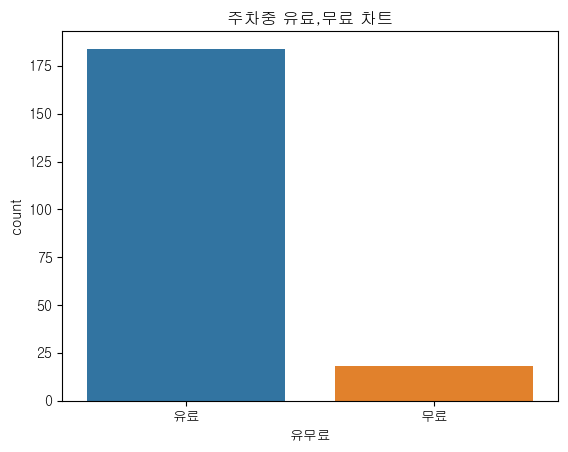

In [30]:
plt.figure()
plt.title('주차중 유료,무료 차트')
sns.countplot(x ='유무료',data=tmp, order=['유료','무료'])

Text(0.5, 0, '기본요금')

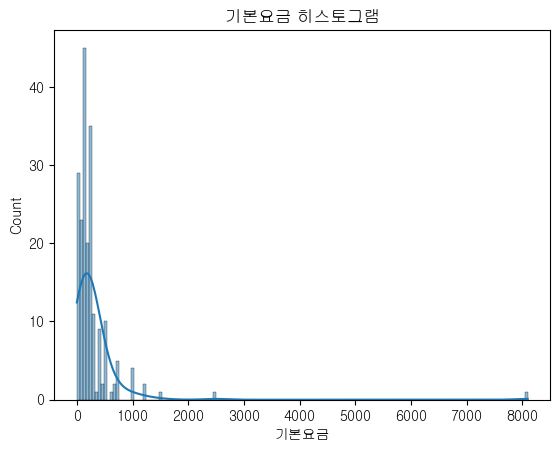

In [31]:
plt.figure()
plt.title('기본요금 히스토그램')
# tmp 데이터프레임의 '기본요금' 열에 대한 히스토그램 그리기
sns.histplot(x=tmp['기본요금'], kde=True) 
# kde=True는 KDE(Kernel Density Estimate)를 추가

# x 축 레이블 추가
plt.xlabel('기본요금')

In [32]:
conn = connect_mysql()
query = 'select * from lol_datas'
lol_df=pd.DataFrame(sql_execute_dict(conn,query))

# 포지션중 하나를 15분 골드와 20분 골드를 kdeplot으로 만들어 보기 

In [33]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [34]:
#tmp에 원하는 롤데이터만 넣음
tmp = lol_df[['teamPosition','g_15', 'g_20',]]

In [35]:
bottom_df =tmp[tmp.teamPosition == 'BOTTOM']

<Axes: xlabel='g_15', ylabel='Density'>

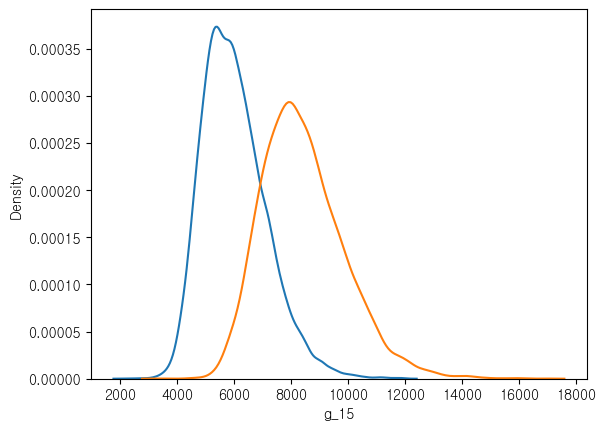

In [36]:
sns.kdeplot(x = bottom_df[bottom_df.g_15 !=0]['g_15'])
sns.kdeplot(x = bottom_df[bottom_df.g_20 !=0]['g_20'])

# 다시 서울시 데이터 

In [37]:
import seaborn as sns

In [38]:
#서울시 주차장비용 데이터
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [39]:
df=get_df(url)

In [40]:
df

,PARKING_NAME,ADDR,PARKING_CODE,PARKING_TYPE,PARKING_TYPE_NM,OPERATION_RULE,OPERATION_RULE_NM,TEL,QUE_STATUS,QUE_STATUS_NM,...,TIME_RATE,ADD_RATES,ADD_TIME_RATE,BUS_RATES,BUS_TIME_RATE,BUS_ADD_TIME_RATE,BUS_ADD_RATES,DAY_MAXIMUM,LAT,LNG
0,초안산근린공원주차장(구),도봉구 창동 24-0,1010089,NW,노외 주차장,1,시간제 주차장,,0,미연계중,...,0.0,300.0,10.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,마들스타디움(근린공원)(구),노원구 상계동 770-2,1012254,NW,노외 주차장,1,시간제 주차장,02-2289-6735,0,미연계중,...,5.0,150.0,5.0,0.0,0.0,0.0,0.0,11000.0,0.000000,0.000000
2,마장동(건물) 공영주차장(구),성동구 마장동 463-2,1013181,NW,노외 주차장,1,시간제 주차장,02-2204-7970,2,20~120분이내 연계데이터 존재(정보수집중),...,5.0,50.0,5.0,0.0,0.0,0.0,0.0,0.0,37.569939,127.035145
3,영등포여고 공영(구),영등포구 신길동 184-3,1025695,NW,노외 주차장,1,시간제 주차장,02-2677-1401,0,미연계중,...,5.0,50.0,5.0,0.0,0.0,0.0,0.0,0.0,37.515205,126.915116
4,당산근린공원 공영(구),영등포구 당산동3가 385-0,1025696,NW,노외 주차장,1,시간제 주차장,02-2677-1401,0,미연계중,...,5.0,150.0,5.0,0.0,0.0,0.0,0.0,0.0,37.525526,126.895794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580435,127.009102
996,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580400,127.009232
997,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580273,127.009760
998,낙산성곽 버스전용 주차장(구),종로구 창신동 615-62,1451409,NS,노상 주차장,4,버스전용 주차장,,0,미연계중,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.580242,127.010035


In [41]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [42]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM',
          'HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [43]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


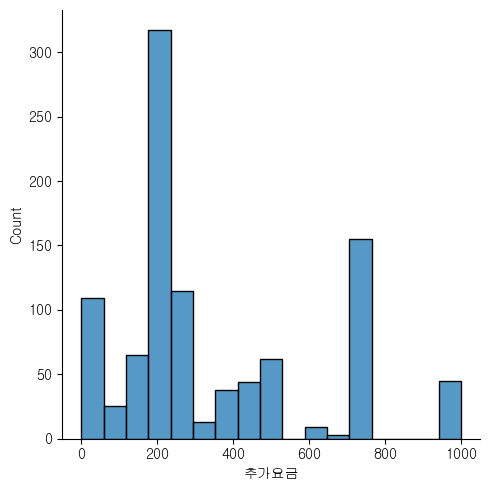

In [44]:
sns.displot(x =tmp['추가요금'])

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


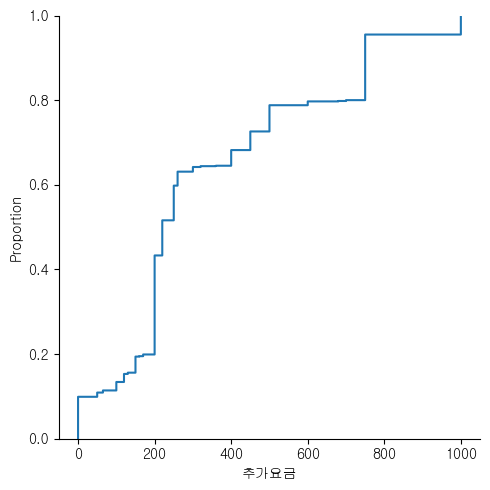

In [45]:
#총값을 1이라고 봤을때 비율을 보여줌 kind='ecdf
sns.displot(x =tmp['추가요금'],kind='ecdf')

<Axes: xlabel='기본요금', ylabel='Density'>

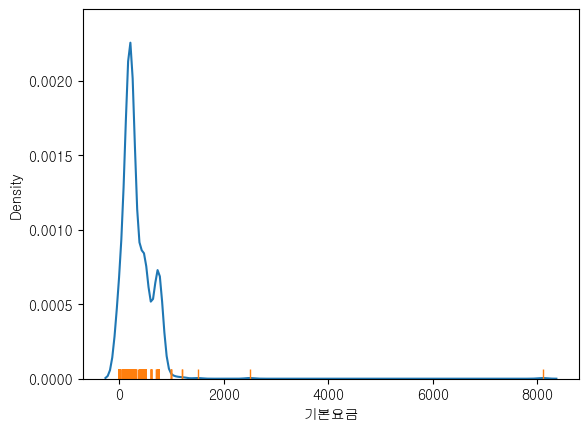

In [46]:
#데이터의 분포를 나타내기 때문에 kdeplot 같이 사용하면좋음
#시각적으로 보여주기 좋음 
sns.kdeplot(x=tmp['기본요금'])
sns.rugplot(x=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

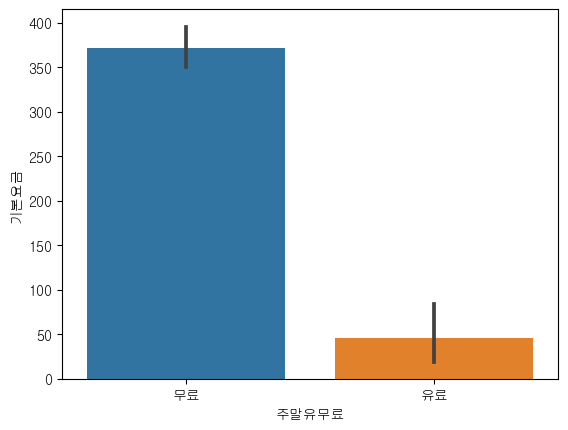

In [47]:
sns.barplot(x= tmp['주말유무료'],y=tmp['기본요금'])
# 가운데 있는건 평균값의 오차범위를 알려주는 오차막대(가운대 오차막대)  

Text(0.5, 0, '주말유무료')

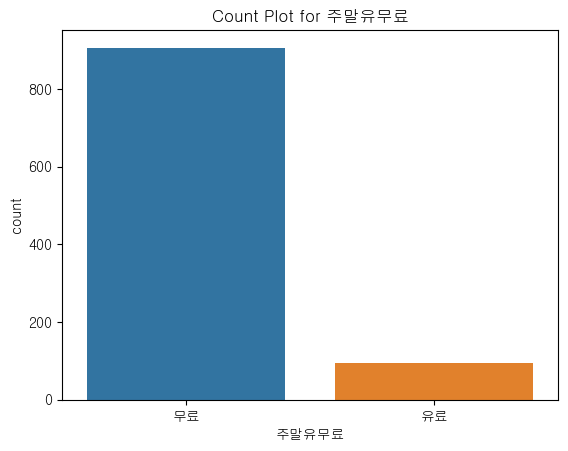

In [48]:
sns.countplot(x=tmp['주말유무료'])

plt.title('Count Plot for 주말유무료')
plt.xlabel('주말유무료')

<Axes: xlabel='주말유무료', ylabel='기본요금'>

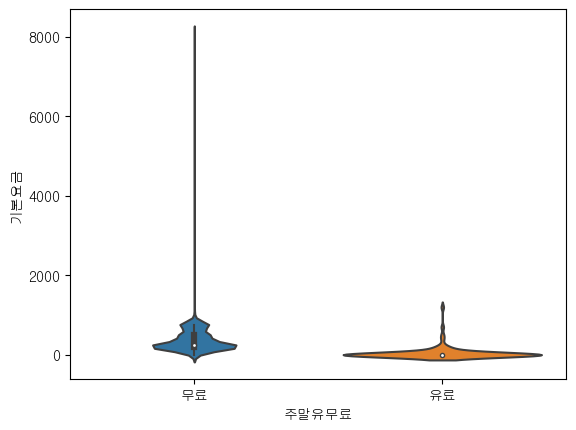

In [49]:
sns.violinplot(x = tmp['주말유무료'], y = tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

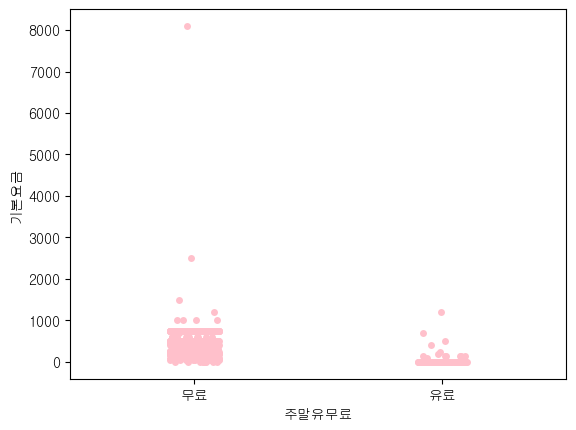

In [50]:
sns.stripplot(x = tmp['주말유무료'], y = tmp['기본요금'],color='pink')

In [51]:
tmp.corr
tmp.columns

Index(['주차장명', '주차수', '유무료', '주말유무료', '공휴일유무료', '월정기권금액', '기본요금', '추가요금'], dtype='object')

In [52]:
tmp.set_index('주차장명',inplace = True)

In [53]:
test=tmp[['주차수','기본요금','추가요금']]

In [54]:
test.corr()

,주차수,기본요금,추가요금
주차수,1.000000,0.002591,-0.167698
기본요금,0.002591,1.000000,0.607381
추가요금,-0.167698,0.607381,1.000000


#피어스 상관계수  correlation coefficient)는 두 변수 사이의 통계적 관계를 표현하기 위해 특정한 상관 관계의 정도

상관이 있을 수 도 있다. 1에 가까우면 가까울 수 도록 상관이 있을 수 도 있다 
-1에 가까울수록 상관이 없을 수 도 있다. 

<Axes: >

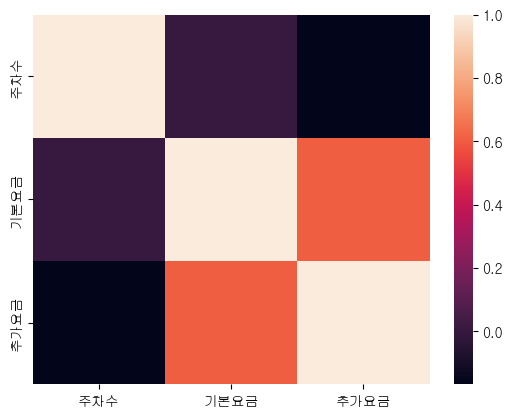

In [55]:
sns.heatmap(test.corr())

<Axes: >

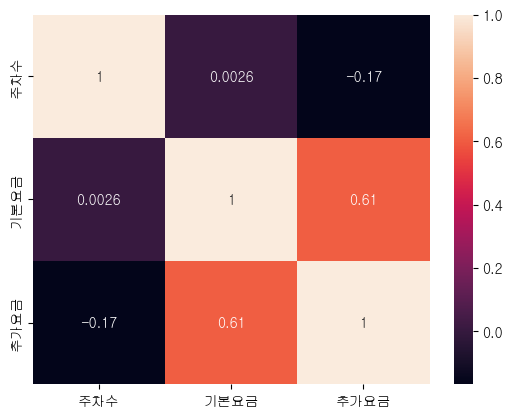

In [56]:
# annot=True 숫자를 추가해줌 
sns.heatmap(test.corr(),annot=True)

<Axes: >

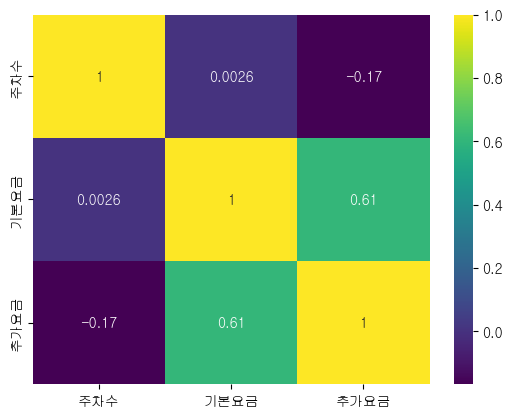

In [57]:
#'viridis' 정해저있는 맵의 색을 변경 
sns.heatmap(test.corr(),annot=True,cmap='viridis')

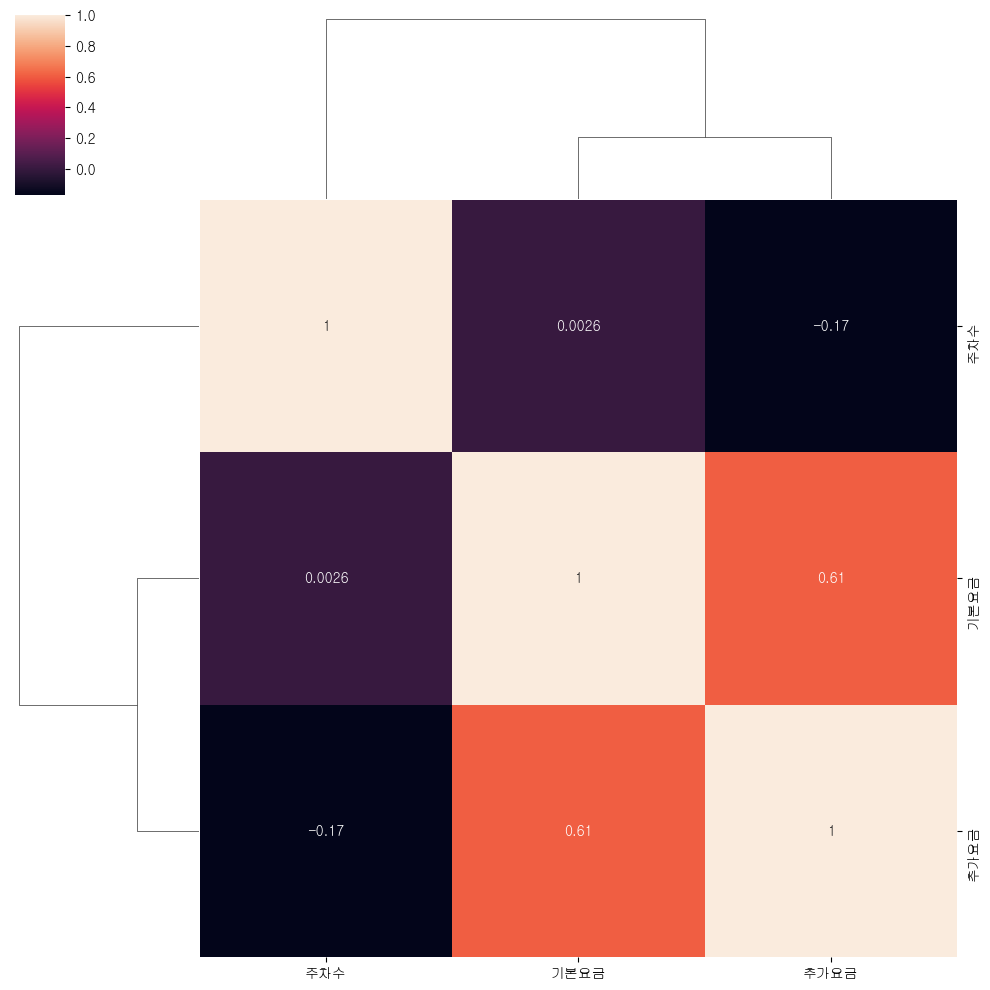

In [58]:
sns.clustermap(test.corr(),annot=True,)
# clustermap로 상관관계를 나타내줌 

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


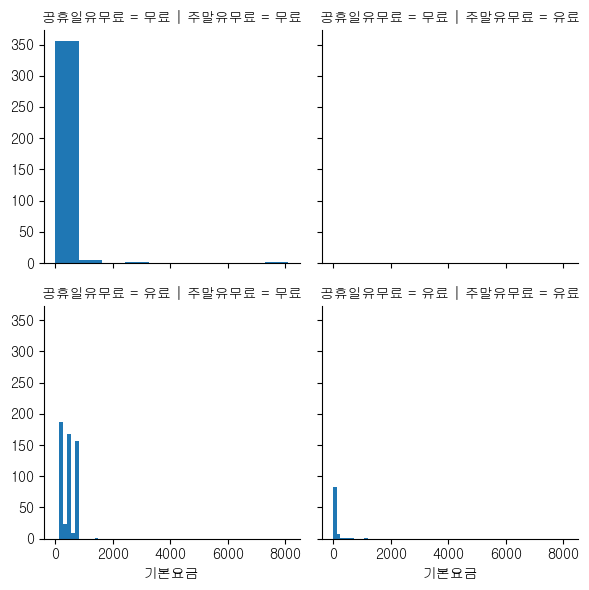

In [59]:
grid = sns.FacetGrid(tmp, col='주말유무료', row='공휴일유무료')
grid.map(plt.hist, '기본요금')

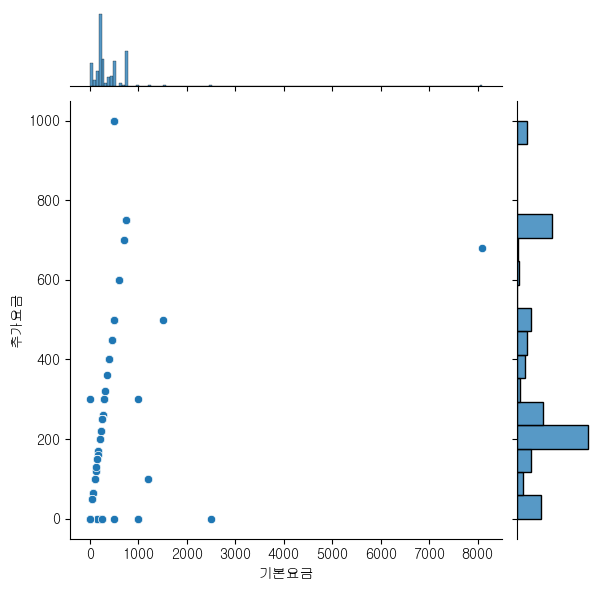

In [60]:
sns.jointplot(x=tmp['기본요금'],y=tmp['추가요금'],kind='scatter')

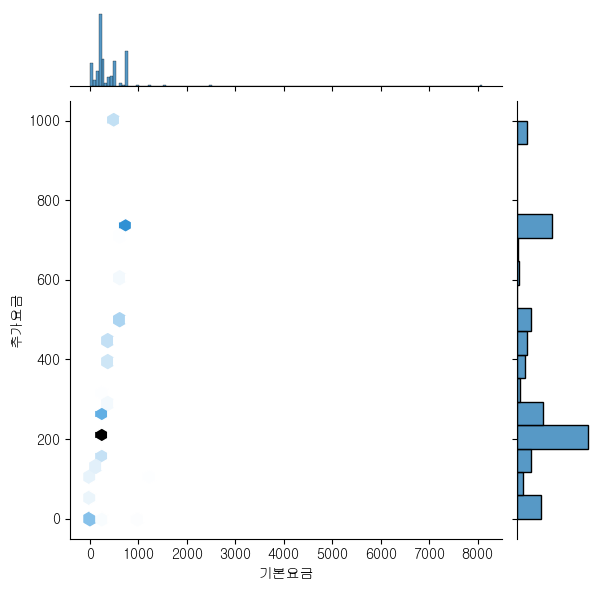

In [61]:
sns.jointplot(x=tmp['기본요금'],y=tmp['추가요금'],kind='hex')

데이터 신뢰구간 (도형)
막대그래프 -회귀

<Axes: xlabel='기본요금', ylabel='추가요금'>

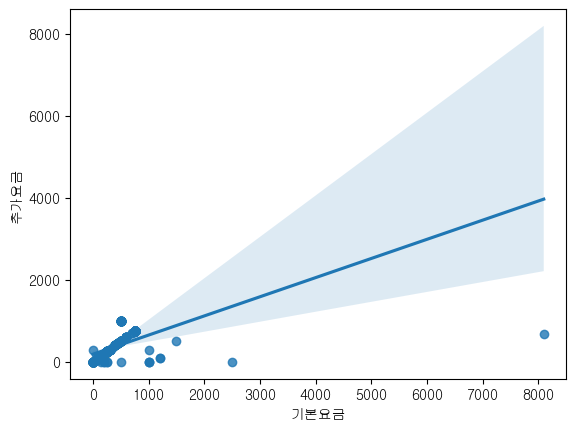

In [62]:
sns.regplot(x='기본요금',y='추가요금',data=tmp)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


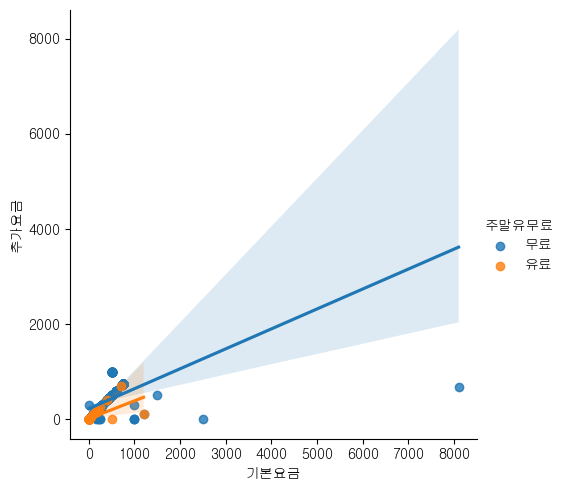

In [63]:
#hue 구분점
sns.lmplot(x='기본요금', y='추가요금', data=tmp, hue='주말유무료')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


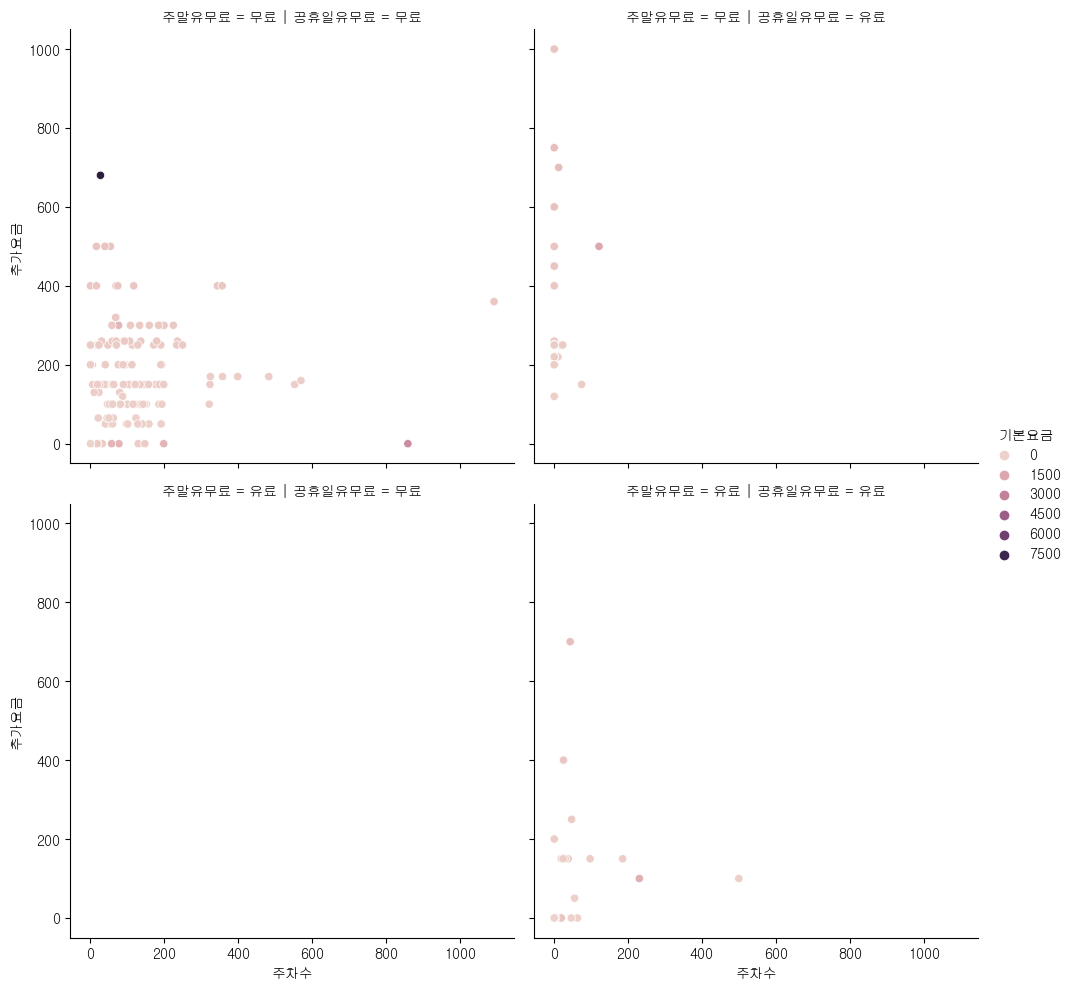

In [64]:
sns.relplot(x='주차수', y='추가요금', hue='기본요금', row='주말유무료', col='공휴일유무료', data=tmp)

In [65]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [66]:
url = "https://api.upbit.com/v1/candles/days"
coin_lst = ['KRW-BTC','KRW-ETH','KRW-XRP']
headers = {"Accept": "application/json"}
df = pd.DataFrame()
for c in coin_lst:
    querystring = {"market":c, "count":"200"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df = pd.concat([df,pd.DataFrame(response.json())])

In [67]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2023-12-28T00:00:00,2023-12-28T09:00:00,57920000.0,58468000.0,57300000.0,57465000.0,1703743305630,7.796990e+10,1.349661e+03,57920000.0,-455000.0,-0.007856
1,KRW-BTC,2023-12-27T00:00:00,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3.965843e+03,57032000.0,888000.0,0.015570
2,KRW-BTC,2023-12-26T00:00:00,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,1703635199803,2.708228e+11,4.735230e+03,58042000.0,-1010000.0,-0.017401
3,KRW-BTC,2023-12-25T00:00:00,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,1703548799890,2.721330e+11,4.687209e+03,58002000.0,40000.0,0.000690
4,KRW-BTC,2023-12-24T00:00:00,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,1703462399990,2.200170e+11,3.729334e+03,59250000.0,-1248000.0,-0.021063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T00:00:00,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1686959997094,1.610391e+11,2.616515e+08,627.0,-3.0,-0.004785
196,KRW-XRP,2023-06-15T00:00:00,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1686873599460,1.663204e+11,2.660830e+08,631.0,-4.0,-0.006339
197,KRW-XRP,2023-06-14T00:00:00,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,1686787200001,2.592919e+11,3.998507e+08,679.0,-48.0,-0.070692
198,KRW-XRP,2023-06-13T00:00:00,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,1686700799794,4.851964e+11,6.910409e+08,689.0,-10.0,-0.014514


In [68]:
my_df = df[['market','candle_date_time_kst','opening_price','high_price',
            'low_price','trade_price','candle_acc_trade_price','candle_acc_trade_volume']].copy()
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,KRW-BTC,2023-12-28T09:00:00,57920000.0,58468000.0,57300000.0,57465000.0,7.796990e+10,1.349661e+03
1,KRW-BTC,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,KRW-BTC,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,KRW-BTC,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,KRW-BTC,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,KRW-XRP,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,KRW-XRP,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,KRW-XRP,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


# 첫번째 전처리 - MARKET에서 코인의 이름만 남기기(KRW-BTC)에서 BTC만남기기 
# 두번째 전처리 -candle_date_time_kst 날짜만 남기기

In [69]:
my_df.columns

Index(['market', 'candle_date_time_kst', 'opening_price', 'high_price',
       'low_price', 'trade_price', 'candle_acc_trade_price',
       'candle_acc_trade_volume'],
      dtype='object')

In [70]:
tmp = my_df[['market', 'candle_date_time_kst']]

In [71]:
tmp

,market,candle_date_time_kst
0,KRW-BTC,2023-12-28T09:00:00
1,KRW-BTC,2023-12-27T09:00:00
2,KRW-BTC,2023-12-26T09:00:00
3,KRW-BTC,2023-12-25T09:00:00
4,KRW-BTC,2023-12-24T09:00:00
...,...,...
195,KRW-XRP,2023-06-16T09:00:00
196,KRW-XRP,2023-06-15T09:00:00
197,KRW-XRP,2023-06-14T09:00:00
198,KRW-XRP,2023-06-13T09:00:00


In [72]:
my_df['market'] = my_df['market'].str.replace('KRW-', '')

In [73]:
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,BTC,2023-12-28T09:00:00,57920000.0,58468000.0,57300000.0,57465000.0,7.796990e+10,1.349661e+03
1,BTC,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,BTC,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,BTC,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,BTC,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,XRP,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,XRP,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,XRP,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,XRP,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


In [74]:
my_df['candle_date_time_kst'] = my_df['candle_date_time_kst'].str.replace('T09:00:00', '')

In [75]:
help(plotly.offline.iplot)

Help on function iplot in module plotly.offline.offline:

iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)
    Draw plotly graphs inside an IPython or Jupyter notebook
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples of
                      graph descriptions.
    
    Keyword arguments:
    show_link (default=False) -- display a link in the bottom-right corner of
                                of the chart that will export the chart to
                                Plotly Cloud or Plotly Enterprise
    link_text (default='Export to plot.ly') -- the text of export link
    validate (default=True) -- validate that all of the keys in the figure
                          

In [76]:
import plotly.express as px

In [77]:
from plotly.offline import iplot

iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="Hello World")
})

In [78]:
fig = px.scatter(my_df[my_df.market=='BTC'],
                x = 'candle_date_time_kst',
                y = 'trade_price')
plotly.offline.iplot(fig)
# fig.show()

In [79]:
fig = px.bar(my_df[my_df.market=='BTC'][-10:],
                x = 'candle_date_time_kst',
                y = 'trade_price')
fig.show()

In [80]:
fig = px.line(my_df[my_df.market=='ETH'],
                x = 'candle_date_time_kst',
                y = 'trade_price')
fig.show()

In [81]:
tmp_df = lol_df[['championName','totalDamageDealtToChampions','totalDamageTaken']]

In [82]:
tmp_df

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Poppy,16199,12908
1,Viego,12057,16026
2,Azir,11248,11933
3,Xayah,12248,6739
4,Rell,4006,9176
...,...,...,...
71521,Karma,37790,41329
71522,Zac,25392,61651
71523,Rammus,24463,44819
71524,Garen,0,13057


#산점도 그래프
#championName 기준 평균내기
x값은 딜량 y값은 받은데미지
color='championName'
@ploty 차트 제작 

In [83]:
tmp_lol=tmp_df.groupby('championName').mean().round().reset_index()

In [84]:
tmp_lol

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Aatrox,20954.0,32537.0
1,Ahri,20026.0,19832.0
2,Akali,21407.0,25503.0
3,Akshan,22546.0,19774.0
4,Alistar,11303.0,29439.0
...,...,...,...
161,Zeri,23010.0,19939.0
162,Ziggs,23733.0,14885.0
163,Zilean,9540.0,16401.0
164,Zoe,22065.0,16154.0


In [85]:
fig =px.scatter(tmp_lol,
               x='totalDamageDealtToChampions',
               y='totalDamageTaken',
               color = 'championName')
fig.show()

# 챔피언 시너지 또는 2:2 구도 분석

- blue팀 정글포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONNAME -> j_champ) (테이블 이름 - blue_jungle)
- blue팀 탑포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONNAME -> t_champ) (테이블 이름 - blue_top)
- blue팀끼리 merge 

- red 동일하게 정글, 탑 뽑아내서 merge


- blue팀과 red팀의 데이터를 merge하기 위해서 enemy_blue / enemy_red 라는 데이터프레임 제작 
- 이후 championName들을 rename을 통해 각각 enemy_j_champ_cham enemy_t_champ으로 변환


- blue팀입장에서 red팀의 데이터 merge
- red 팀 입장에서 blue팀 데이터 merge

- 위에서 만들어진 merge테이블을 concat을 이용해서 하나의 데이터 테이블로 만들기
- games와 win의 횟수를 구하고 win_rate(승률) 컬럼을 추가한 result 테이블 

In [86]:
tmp=lol_df.columns

In [87]:
tmp

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')